Pre-processing the data


In [ ]:
import pandas as pd

df = pd.read_csv("/Competition_Dataset.csv")
df.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
# Check for nulls
df.isnull().sum()

# Convert timestamp to datetime object
df['Dates'] = pd.to_datetime(df['Dates'])

# Optional: Clean text columns (strip spaces, lowercase)
df['Category'] = df['Category'].str.strip().str.upper()


In [ ]:
# Extract useful time features
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Hour'] = df['Dates'].dt.hour
df['DayOfWeek'] = df['DayOfWeek'].str.title()


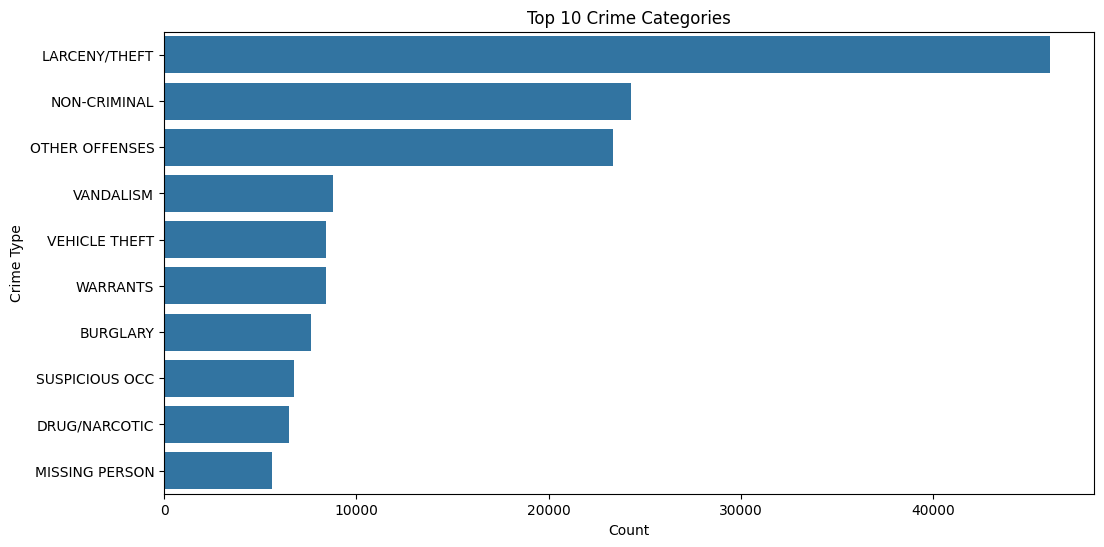

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().head(10).index)
plt.title("Top 10 Crime Categories")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


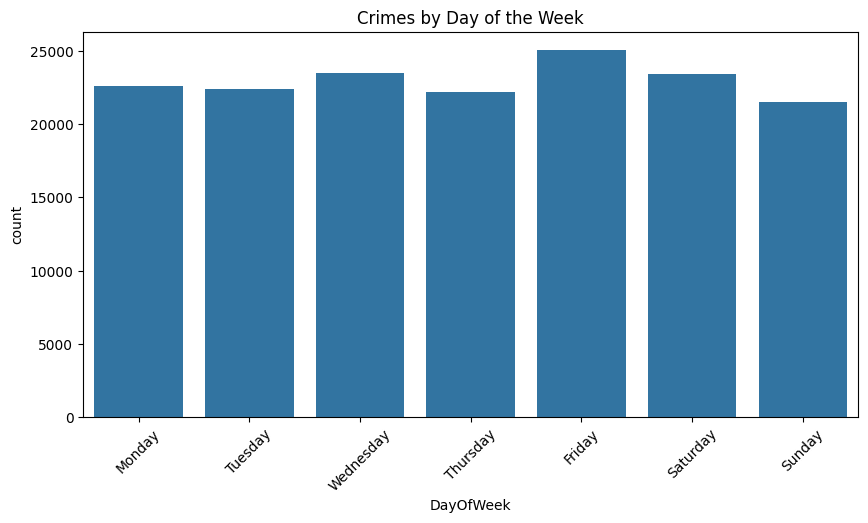

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='DayOfWeek', order=order)
plt.title("Crimes by Day of the Week")
plt.xticks(rotation=45)
plt.show()


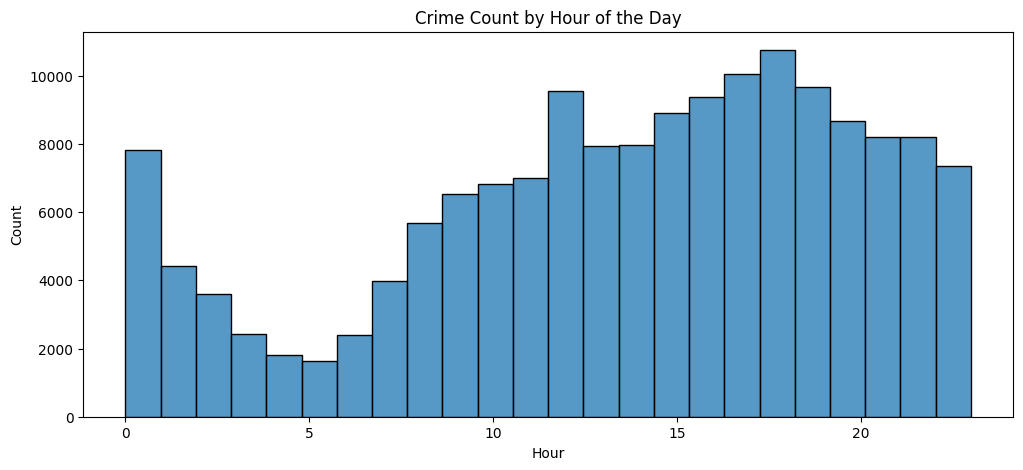

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['Hour'], bins=24, kde=False)
plt.title("Crime Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


Level 2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Drop rows with missing Descript or Category
df = df.dropna(subset=['Descript', 'Category'])

# Split into features and labels
X = df['Descript']
y = df['Category']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.9992534527808884

Classification Report:
                         precision    recall  f1-score   support

                 ARSON       1.00      1.00      1.00        63
            BAD CHECKS       1.00      1.00      1.00         4
               BRIBERY       1.00      0.95      0.98        21
              BURGLARY       1.00      1.00      1.00      1538
    DISORDERLY CONDUCT       1.00      1.00      1.00       125
         DRUG/NARCOTIC       1.00      1.00      1.00      1329
          EMBEZZLEMENT       1.00      1.00      1.00        40
             EXTORTION       1.00      1.00      1.00         8
FORGERY/COUNTERFEITING       1.00      0.99      1.00       176
                 FRAUD       1.00      1.00      1.00       715
            KIDNAPPING       1.00      1.00      1.00       125
         LARCENY/THEFT       1.00      1.00      1.00      9228
        MISSING PERSON       1.00      1.00      1.00      1065
          NON-CRIMINAL       1.00      1.00      

Assigning Crim severity


In [ ]:
# Define severity rules
severity_map = {
    1: ["NON-CRIMINAL", "SUSPICIOUS OCCURRENCE", "MISSING PERSON", "RUNAWAY", "RECOVERED VEHICLE"],
    2: ["WARRANTS", "OTHER OFFENSES", "VANDALISM", "TRESPASS", "DISORDERLY CONDUCT", "BAD CHECKS"],
    3: ["LARCENY/THEFT", "VEHICLE THEFT", "FORGERY/COUNTERFEITING", "DRUG/NARCOTIC", "STOLEN PROPERTY", "FRAUD", "BRIBERY", "EMBEZZLEMENT"],
    4: ["ROBBERY", "WEAPON LAWS", "BURGLARY", "EXTORTION"],
    5: ["KIDNAPPING", "ARSON"]
}

# Create a reverse lookup
category_to_severity = {cat: sev for sev, cats in severity_map.items() for cat in cats}

# Assign severity to original data
df['Severity'] = df['Category'].map(category_to_severity)

# Show example
df[['Descript', 'Category', 'Severity']].head()


,Descript,Category,Severity
0,WARRANT ARREST,WARRANTS,2.0
1,TRAFFIC VIOLATION ARREST,OTHER OFFENSES,2.0
2,TRAFFIC VIOLATION ARREST,OTHER OFFENSES,2.0
3,GRAND THEFT FROM LOCKED AUTO,LARCENY/THEFT,3.0
4,GRAND THEFT FROM LOCKED AUTO,LARCENY/THEFT,3.0


In [ ]:
predicted_severity = [category_to_severity.get(cat, 0) for cat in y_pred]


Level 3


In [ ]:
!streamlit run app.py &>/dev/null&


In [ ]:
%%writefile requirements.txt
streamlit
pandas
folium
streamlit-folium


Overwriting requirements.txt


In [ ]:
from google.colab import files
#files.download("app.py")
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating app.py for hugging spaces


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import folium
from streamlit_folium import folium_static
import os

# Ensure dataset exists
@st.cache_data
def load_data():
    file_path = os.path.join(os.path.dirname(__file__), "Competition_Dataset.csv")
    df = pd.read_csv(file_path)
    df['Dates'] = pd.to_datetime(df['Dates'])
    return df

df = load_data()

# Sidebar
st.sidebar.title("CityX Crime Watch")
st.sidebar.write("Explore crime patterns with interactive maps.")

# Show dataset
st.write("### Crime Data Sample")
st.dataframe(df.head())

# Generate Map
if 'Y' in df.columns and 'X' in df.columns:
    map_center = [df['Y'].mean(), df['X'].mean()]
    crime_map = folium.Map(location=map_center, zoom_start=12)

    # Add markers
    for _, row in df.sample(200, random_state=42).dropna().iterrows():
        folium.Marker(
            location=[row['Y'], row['X']],
            popup=row['Category'],
            icon=folium.Icon(color="red")
        ).add_to(crime_map)

    # Display map
    st.write("### Crime Hotspots in CityX")
    folium_static(crime_map)
else:
    st.write("🚨 Error: Dataset is missing 'Latitude' (Y) and 'Longitude' (X) columns!")


Overwriting app.py


In [ ]:
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
st.write("### Dataset Columns")
st.write(df.columns.tolist())  # Show available column names


2025-03-21 00:59:23.778 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 00:59:24.092 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-21 00:59:24.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 00:59:24.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 00:59:24.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 00:59:24.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 00:59:24.127 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
